<a href="https://colab.research.google.com/github/Kent7474/Proyecto_Seminario/blob/v2/An%C3%A1lisis_de_activos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT DE LIBRERÍAS

In [48]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Frameworks principales
import pandas as pd
import numpy as np

# from pandas_datareader import data as pdr #No está funcionando
import yfinance as yf

# Frameworks secundarios
from datetime import datetime
from datetime import timedelta
    # Visualización
import matplotlib.pyplot as plt
import statistics
import seaborn as sns




In [49]:
pd.options.display.max_columns = 50
pd.set_option('display.max_colwidth', 15)


# DEFINICIÓN DE ACTIVOS Y FECHAS

## Periodos - Fecha inicio y fin

In [50]:
 #  YYYY-mm-dd
fechaInicio = "2020-01-01"
#today = "2022-11-01"
today = datetime.today().strftime('%Y-%m-%d')

In [51]:
#activos = ["AAPL", "MSFT", "AMZN", "GOOGL", "ENPH", "META", "PEP", "TSLA", "V", "CAR", "TTD", "AMGN", "AAL", "TMUS", "CPRX", "ICPT"]
#activos = ["AAPL", "MSFT", "AMZN", "GOOGL", "META", "TSLA", "V"]
#activos = ["RIOT", "WKHS", "SPCE", "OSTK", "TSLA", "PLUG", "ZM", "QS", "BYND", "XPEV"]
#activos = ["RIOT", "WKHS", "SPCE", "OSTK", "TSLA", "PLUG", "ZM", "QS", "BYND", "XPEV", "AAPL", "MSFT", "AMZN", "GOOGL", "FB", "JNJ", "V", "DIS", "PFE", "KO"]

''' NASDAQ, más rendimiento a mayor riesgo'''
activos = ["AMD","LCID", "MNST", "BIIB", "NVDA", "ADBE", "NFLX", "INTC"] # ESTAAAA

#activos = ["AMD","LCID", "MNST", "BIIB", "NVDA", "ADBE", "NFLX", "INTC", "HON","GFS", "FISV", "FAST", "EXC", "CSX", "CRWD", "COST", "MELI", "META", "MRVL", "MAR", "LULU", "HON", "GFS" ]
#activos = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META', 'JNJ', 'PG', 'V', 'JPM', 'KO', 'PEP', 'XOM', 'CVX', 'T', 'VZ', 'INTC', 'CSCO', 'ADBE', 'CRM', 'ABT', 'AMGN', 'UNH', 'PFE', 'MRK', 'BMY', 'RTX', 'LMT', 'GS', 'MA']


''' Excel facu '''
#activos = ['FNKO', 'PEP', 'MCD', 'SONY', 'DIS', 'CMCSA', 'NTDOY', 'CCOEY', 'MDLZ', 'GME']

'''Excel práctica en clase '''
#activos = ['TSLA', 'META', 'AAPL', 'AMZN', 'NFLX']

len(activos)

8

# DESCARGA Y VISUALIZACIÓN DE RENDIMIENTOS.
(Columna 'Adj Close') desde Yahoo Finance.

In [52]:
''' Con la función yf.download descargamos los rendimientos de cada activo
    según las fechas dadas (fechaInicio y today). De todas las columnas que
    nos trae, nos quedamos con 'Adj Close' '''
dataSet = yf.download(activos, start=fechaInicio, end=today)['Adj Close']
#dataSet = yf.download(activos, start=fechaInicio, end=today, interval='1mo')['Adj Close']

''' Revisamos los primero y los últimos 3 registros del DataFrame,
     para asegurarnos que tenga datos.'''
display(dataSet)
pd.DataFrame(dataSet).to_excel("DataSet.xlsx")
#display(dataSet.head(3))
#display(dataSet.tail(3))

[*********************100%***********************]  8 of 8 completed


,ADBE,AMD,BIIB,INTC,LCID,MNST,NFLX,NVDA
Date,,,,,,,,
2020-01-02,334.429993,49.099998,294.239990,54.760353,NaN,31.850000,329.809998,59.754223
2020-01-03,331.809998,48.599998,290.850006,54.094292,NaN,31.639999,325.899994,58.797794
2020-01-06,333.709991,48.389999,290.820007,53.941288,NaN,31.690001,335.829987,59.044369
2020-01-07,333.390015,48.250000,290.089996,53.041218,NaN,31.844999,330.750000,59.759197
2020-01-08,337.869995,47.830002,292.660004,53.077217,NaN,31.910000,339.260010,59.871284
...,...,...,...,...,...,...,...,...
2023-06-16,495.179993,120.080002,297.480011,36.369999,6.48,58.450001,431.959991,426.920013
2023-06-20,485.859985,118.930000,293.790009,35.000000,6.32,58.360001,434.700012,438.079987
2023-06-21,477.480011,112.110001,294.359985,32.900002,6.05,58.410000,424.450012,430.450012


In [53]:
dataSet.max()

ADBE    688.369995
AMD     161.910004
BIIB    414.709991
INTC     63.348778
LCID     58.049999
MNST     59.939999
NFLX    691.690002
NVDA    438.079987
dtype: float64

### Gráfico de precios de períodos

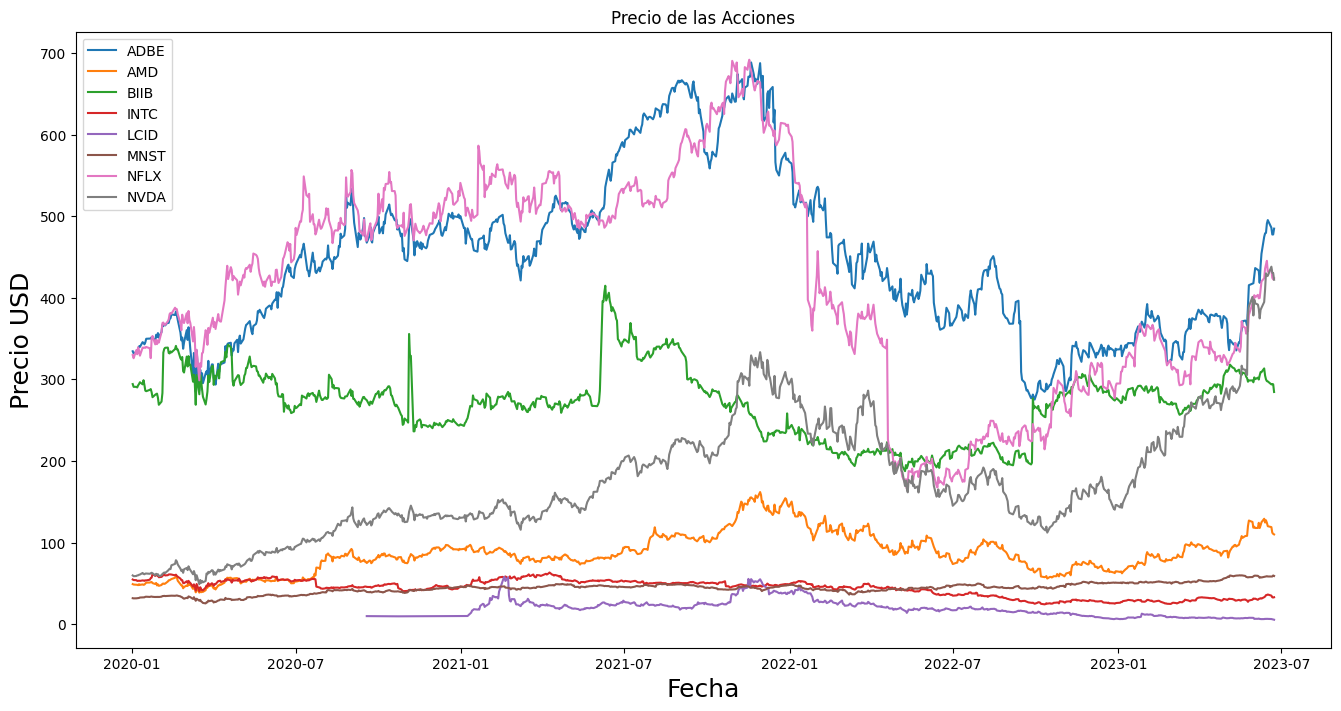

In [54]:
plt.figure(figsize=(16.2, 8))
for i in dataSet.columns.values:
    plt.plot(dataSet[i], label=i)
plt.title('Precio de las Acciones')
plt.xlabel('Fecha', fontsize=18)
plt.ylabel('Precio USD', fontsize=18)
plt.legend(dataSet.columns.values, loc='upper left')
plt.savefig('plotprecios.png', dpi=200, bbox_inches='tight')
plt.show()


### Calculamos el rendimiento de cada acción con el periodo anterior

In [55]:
''' Divide el valor de cada columna (df) por la columna anterior (df.shift(1))
    Luego le resta -1 para obtener el rendimiento.'''
rendimiento = (dataSet / dataSet.shift(1) -1).dropna()
rendimiento.head() * 100

,ADBE,AMD,BIIB,INTC,LCID,MNST,NFLX,NVDA
Date,,,,,,,,
2020-09-21,1.730302,4.017085,-2.251539,-0.340760,-0.303344,-0.772250,3.700318,2.690897
2020-09-22,2.342104,-0.307936,1.662327,0.462591,0.202844,1.084468,0.783832,0.962678
2020-09-23,-3.367021,-3.822386,-0.205308,-2.262262,-0.303641,-1.817496,-4.185929,-4.067185
2020-09-24,-0.578244,1.458579,-0.793535,0.696440,-0.812182,0.269956,0.524851,1.849680
2020-09-25,2.589430,2.954363,1.199819,1.586657,0.409416,1.012822,2.071535,4.257766


### Calculo de esperanza, varianza y desvío estandar

In [56]:
esp_var_desv = pd.DataFrame(rendimiento.mean() *100, columns=["Esperanza"])

esp_var_desv = esp_var_desv.T
esp_var_desv = esp_var_desv.append(pd.DataFrame(rendimiento.var(ddof=0), columns=["Varianza"]).T)
esp_var_desv = esp_var_desv.append(pd.DataFrame(rendimiento.std(ddof=0)*100, columns=["STD"]).T)
esp_var_desv

,ADBE,AMD,BIIB,INTC,LCID,MNST,NFLX,NVDA
Esperanza,0.032809,0.107900,0.057680,-0.020874,0.095223,0.069713,0.038880,0.236974
Varianza,0.000545,0.001053,0.001172,0.000517,0.003707,0.000232,0.001015,0.001167
STD,2.334176,3.245438,3.423606,2.273607,6.088199,1.523349,3.185473,3.415697


### Distribución de rendimientos

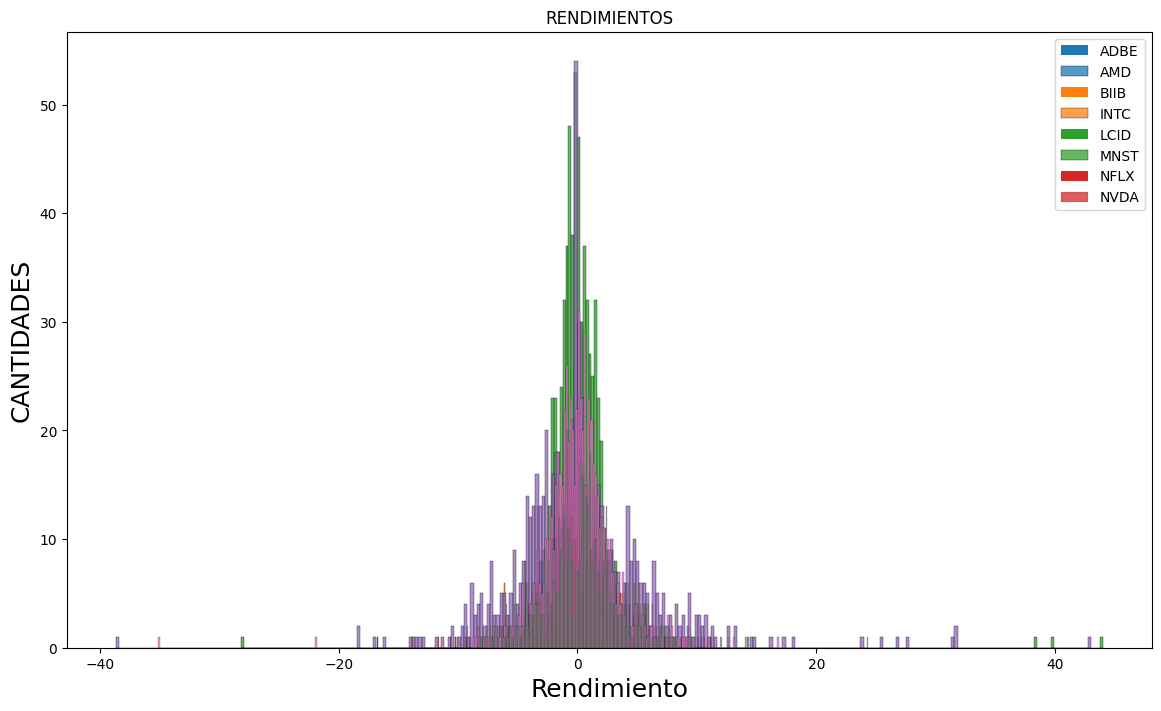

In [57]:
plt.figure(figsize=(14, 8))
for i in rendimiento.columns.values:
    #plt.hist(rendimiento[i]*100, label = i, bins=300)
    sns.histplot(rendimiento[i]*100, label=i, bins=300)
plt.title('RENDIMIENTOS')
plt.xlabel('Rendimiento', fontsize=18)
plt.ylabel('CANTIDADES', fontsize=18)
plt.legend(rendimiento.columns.values, loc='upper left')
plt.legend(rendimiento.columns.values)
#eliminamos los extremos con menos cantidad de datos.
#plt.xlim(-20,20)
plt.show()

### Matriz de covarianzas.
Valor que refleja en cómo varían dos variables de forma conjunta respecto a sus medias.

In [58]:
mCovarianza = rendimiento.cov(ddof=0, numeric_only=False)
cm = sns.light_palette("green", as_cmap=True)
mCovarianza.style.background_gradient(cmap=cm)

,ADBE,AMD,BIIB,INTC,LCID,MNST,NFLX,NVDA
ADBE,0.000545,0.000468,0.000210,0.000237,0.000391,0.000173,0.000366,0.000536
AMD,0.000468,0.001053,0.000223,0.000376,0.000676,0.000176,0.000455,0.000891
BIIB,0.000210,0.000223,0.001172,0.000137,0.000288,0.000126,0.000246,0.000261
INTC,0.000237,0.000376,0.000137,0.000517,0.000310,0.000124,0.000251,0.000379
LCID,0.000391,0.000676,0.000288,0.000310,0.003707,0.000172,0.000464,0.000661
MNST,0.000173,0.000176,0.000126,0.000124,0.000172,0.000232,0.000133,0.000220
NFLX,0.000366,0.000455,0.000246,0.000251,0.000464,0.000133,0.001015,0.000514
NVDA,0.000536,0.000891,0.000261,0.000379,0.000661,0.000220,0.000514,0.001167


### Carga de pruebas de WEIGHT, Rendimiento y riesgo del portafolio

#### Se definen 3 arrays
- PesosPortafolio = pesos randoms con cantidad de elementos igual al numero de activos.
- rportafolio = Rendimiento del portafolio
- sdPortafolio = desvio standard, o riesgo del portafolio

In [59]:
pesosPortafolio = []
rPortafolio = []
sdPortafolio = []

#guardamos la cantidad de activos que tenemos para el análisis.
nrosActivos = len(rendimiento.columns)
nrosActivos

8

In [60]:
for x in range(5000):
    pesos = np.random.random(len(rendimiento.columns)) # Arreglo de 1 x la cantidad de activos
    # Dividir por la suma total de los números
    pesos /= np.sum(pesos)
    # Agrega cada prueba a la matriz
    pesosPortafolio.append(pesos)

    # Retorno la "sumaProducto" o el producto de la matriz
    # con los porcentajes de inversion X el rendimiento de cada activo
    rPortafolio.append(np.dot(rendimiento.mean(), pesos)) # rendimiento.mean() = matriz de 7X1

    # np.dot(mCovarianzas, pesos)  retorna matriz 1X7 de multiplicar los
    # pesos(porcentaje a invertir) y la matriz de covarianzas
    # A esa matriz de 1X7 de varianzas, la vuelvo a multiplicar por pesos.T
    # eso nos devuelve un solo resultado, la varianza de la inversion y
    # posteriormente el STD
    sdPortafolio.append(np.sqrt(
        np.dot(pesos.T, np.dot(mCovarianza, pesos))
    ))

#### Ejemplo
Para la primera distribución de la inversión en % en los 7 activos:

In [61]:
for i in range(len(pesosPortafolio[0])):
    print(rendimiento.columns[i],' -> ', round(pesosPortafolio[0][i]*100,2), '%')

ADBE  ->  6.19 %
AMD  ->  21.34 %
BIIB  ->  5.42 %
INTC  ->  6.69 %
LCID  ->  19.8 %
MNST  ->  18.86 %
NFLX  ->  18.94 %
NVDA  ->  2.76 %


Va a tener el siguiente rendimiento:

In [62]:
str(round(rPortafolio[0], 5)*100) + ' %'

'0.073 %'

Tiene el siguiente riesgo (%):

In [63]:
str(round(sdPortafolio[0], 3)*100) + ' %'

'2.3 %'

###Generación de diccionarios
A partir de estas 3 variables, vamos a buscar minimizar el riesgo y maximizar el retorno
Generamos un diccionario de listas -> lista de rendimiento, riesgo y una lista para cada acción con sus porcentajes de inversión

In [64]:
diccionario = {'Rendimiento': rPortafolio, 'Riesgo': sdPortafolio}
for i, accion in enumerate(rendimiento.columns.tolist()):
    diccionario['USD ' + accion] = [w[i] for w in pesosPortafolio]

Generamos un DataFrame a partir del diccionario para tener las inversiones, riesgo y rendimiento en una sola linea

In [65]:
matrizPortafolio = pd.DataFrame(diccionario)
matrizPortafolio

,Rendimiento,Riesgo,USD ADBE,USD AMD,USD BIIB,USD INTC,USD LCID,USD MNST,USD NFLX,USD NVDA
0,0.000727,0.022971,0.061863,0.213416,0.054200,0.066927,0.198040,0.188626,0.189361,0.027568
1,0.000745,0.025669,0.108150,0.068474,0.293046,0.004934,0.279137,0.110522,0.099633,0.036103
2,0.000865,0.020415,0.206776,0.148966,0.199874,0.078588,0.012440,0.116843,0.058769,0.177744
3,0.000891,0.023501,0.228538,0.115934,0.010169,0.093410,0.198823,0.162321,0.025513,0.165291
4,0.000595,0.019531,0.204483,0.217202,0.167331,0.078496,0.063869,0.146865,0.120105,0.001649
...,...,...,...,...,...,...,...,...,...,...
4995,0.000775,0.022712,0.126566,0.038872,0.141625,0.166731,0.169251,0.034065,0.154251,0.168640
4996,0.000748,0.021380,0.088713,0.062632,0.033033,0.244663,0.187023,0.230595,0.009433,0.143908
4997,0.000781,0.026622,0.051184,0.082696,0.103888,0.042640,0.269326,0.056850,0.304900,0.088516
4998,0.000813,0.021628,0.040268,0.062755,0.167068,0.163406,0.154860,0.119320,0.127997,0.164326


## Frontera Eficiente
A continuación tenemos todas las carteras posibles con sus Riesgos y Rendimientos.

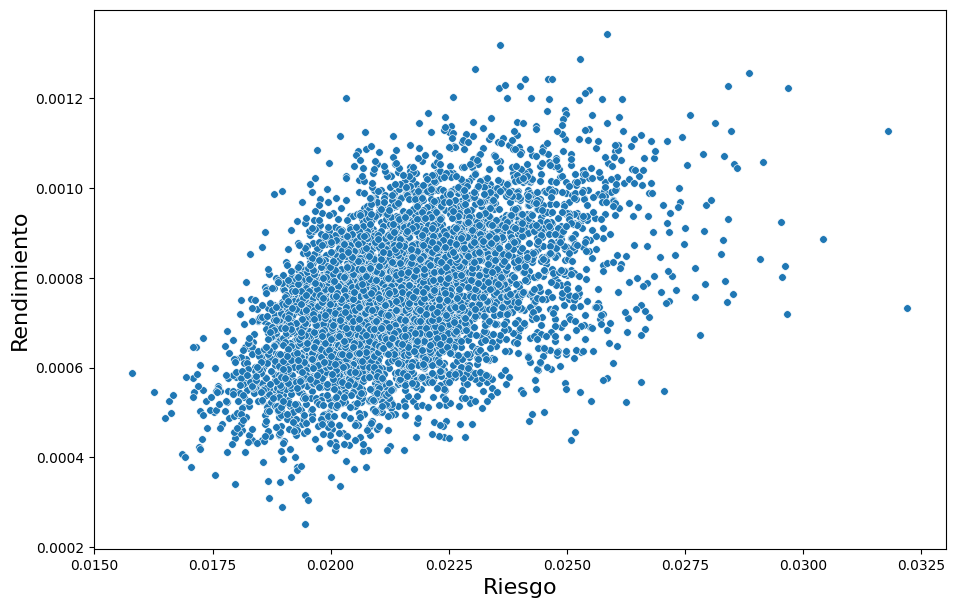

In [66]:
plt.figure(figsize=(11,7))
sns.scatterplot(data=matrizPortafolio, x = 'Riesgo', y='Rendimiento', s=30)
plt.xlabel('Riesgo', fontsize=16)
plt.ylabel('Rendimiento', fontsize=16)
plt.show()

# ANÁLISIS

### Mínima Varianza
Buscamos el menor riesgo. Las carteras eficientes en las cuales deberíamos invertir, debe tener riesgo mayor a la mínima varianza, pero siempre mayor rendimiento.
En el siguiente gráfico están ubicadas por encima de la línea punteada.

In [67]:
minimaVarianza = matrizPortafolio.iloc[matrizPortafolio['Riesgo'].idxmin()]
display(minimaVarianza)
display(minimaVarianza.loc["Rendimiento"]*100)

Rendimiento    0.000589
Riesgo         0.015801
USD ADBE       0.091082
USD AMD        0.041579
USD BIIB       0.027253
USD INTC       0.149806
USD LCID       0.039315
USD MNST       0.478233
USD NFLX       0.126488
USD NVDA       0.046244
Name: 4673, dtype: float64

0.05887877099005843

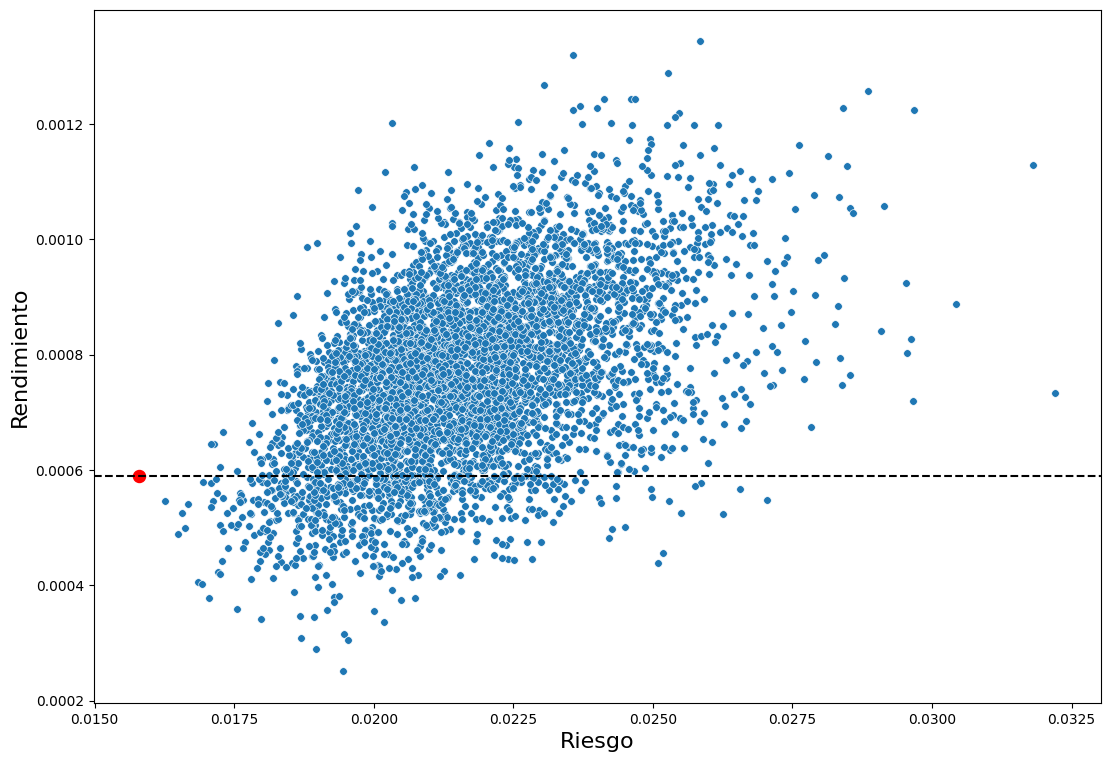

In [68]:
plt.figure(figsize=(13,9))
sns.scatterplot(data=matrizPortafolio, x = 'Riesgo', y='Rendimiento', s=30)
plt.scatter(x=minimaVarianza[1], y=minimaVarianza[0], color='red', marker='.', s=300)
plt.axhline(y=minimaVarianza[0], color='black', linestyle='--')
plt.xlabel('Riesgo', fontsize=16)
plt.ylabel('Rendimiento', fontsize=16)
plt.show()

### Mayor rendimiento
Buscamos la inversión con mayor rendimiento de las pruebas.
A partir de este punto, todos los que se encuetran a la derecha de la línea punteada, serán irrelevantes porque tienene menor rendimiento y mayor riesgo.


In [69]:
mayorRendimiento = matrizPortafolio.loc[matrizPortafolio['Rendimiento'].idxmax()]
mayorRendimiento

Rendimiento    0.001343
Riesgo         0.025840
USD ADBE       0.247624
USD AMD        0.117180
USD BIIB       0.024179
USD INTC       0.042681
USD LCID       0.099154
USD MNST       0.044238
USD NFLX       0.000872
USD NVDA       0.424071
Name: 2789, dtype: float64

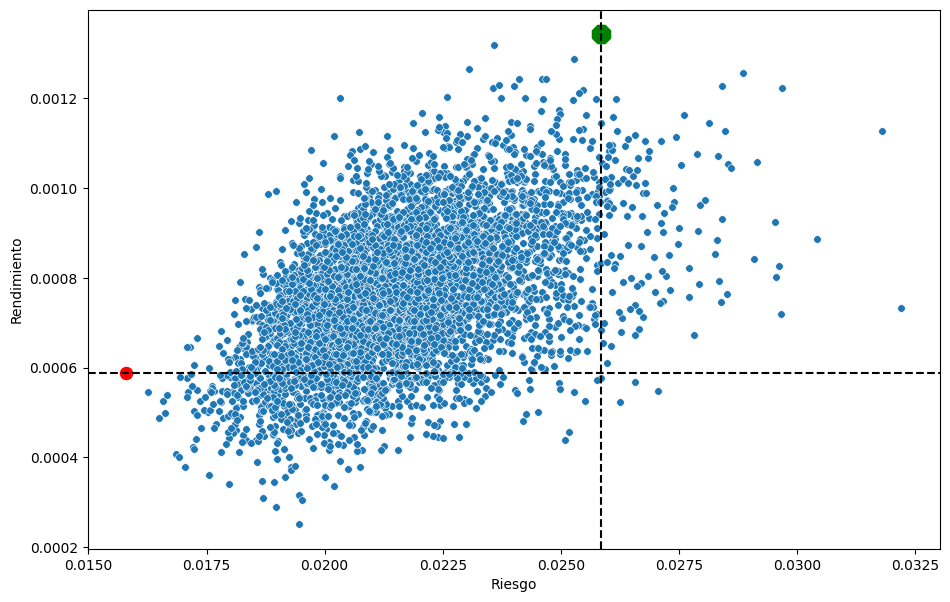

In [70]:
'''matrizPortafolio.plot(x='Riesgo',y='Rendimiento', kind='scatter', figsize=(13,9) )
plt.scatter(x=minimaVarianza[1], y=minimaVarianza[0], color='red', marker='*', s=300)
plt.scatter(x=optimo[1], y=optimo[0], color='green', marker='*', s=300)
plt.savefig('FronteraEficiente', dpi=200)'''


plt.figure(figsize=(11,7))
sns.scatterplot(data=matrizPortafolio, x = 'Riesgo', y='Rendimiento', s=30)
plt.scatter(x=mayorRendimiento[1], y=mayorRendimiento[0], color='green', marker='8', s=200)
plt.scatter(x=minimaVarianza[1], y=minimaVarianza[0], color='red', marker='.', s=300)
plt.axhline(y=minimaVarianza[0], color='black', linestyle='--')
plt.axvline(x=mayorRendimiento[1], color='black', linestyle='--')
plt.show()

### Cuadrante óptimo
Selección de los portafolios óptimos cuadrante superior izquierdo

In [71]:
m = matrizPortafolio
m = m[(m["Rendimiento"] >= minimaVarianza[0]) & (m["Riesgo"] <= mayorRendimiento[1])]

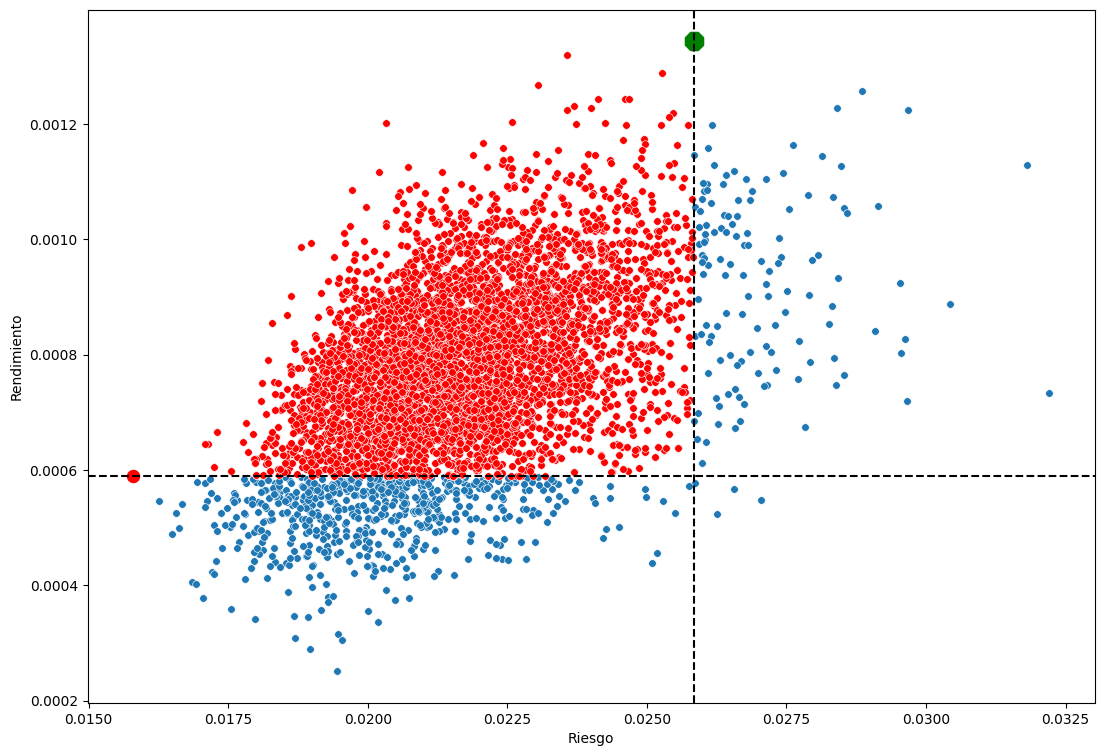

In [72]:
plt.figure(figsize=(13,9))
sns.scatterplot(data=matrizPortafolio, x = 'Riesgo', y='Rendimiento', s=30)
sns.scatterplot(data=m, x = 'Riesgo', y='Rendimiento', color="red", s=30)
plt.scatter(x=mayorRendimiento[1], y=mayorRendimiento[0], color='green', marker='8', s=200)
plt.scatter(x=minimaVarianza[1], y=minimaVarianza[0], color='red', marker='.', s=300)
plt.axhline(y=minimaVarianza[0], color='black', linestyle='--')
plt.axvline(x=mayorRendimiento[1], color='black', linestyle='--')
plt.show()

### Pendiente óptima

In [73]:
minimaVarianza

Rendimiento    0.000589
Riesgo         0.015801
USD ADBE       0.091082
USD AMD        0.041579
USD BIIB       0.027253
USD INTC       0.149806
USD LCID       0.039315
USD MNST       0.478233
USD NFLX       0.126488
USD NVDA       0.046244
Name: 4673, dtype: float64

In [74]:
# Encontrar la pendiente de la línea recta que cruza los dos puntos.
x1, y1 = minimaVarianza['Riesgo'], minimaVarianza['Rendimiento']
x2, y2 = mayorRendimiento['Riesgo'], mayorRendimiento['Rendimiento']
pendiente = (y2 - y1) / (x2 - x1)
print("Pendiente: ", pendiente)
b = y1 - pendiente * x1
print("Punto de corte", b)


Pendiente:  0.07515366025629654
Punto de corte -0.0005987397463403508


In [75]:
pendiente_optima = pd.DataFrame(columns = m.columns)
for index, row in m.iterrows():
    if row['Rendimiento'] >= pendiente * row['Riesgo'] + b:
       pendiente_optima = pendiente_optima.append(row)

pendiente_optima.reset_index(drop=True, inplace=True) ;

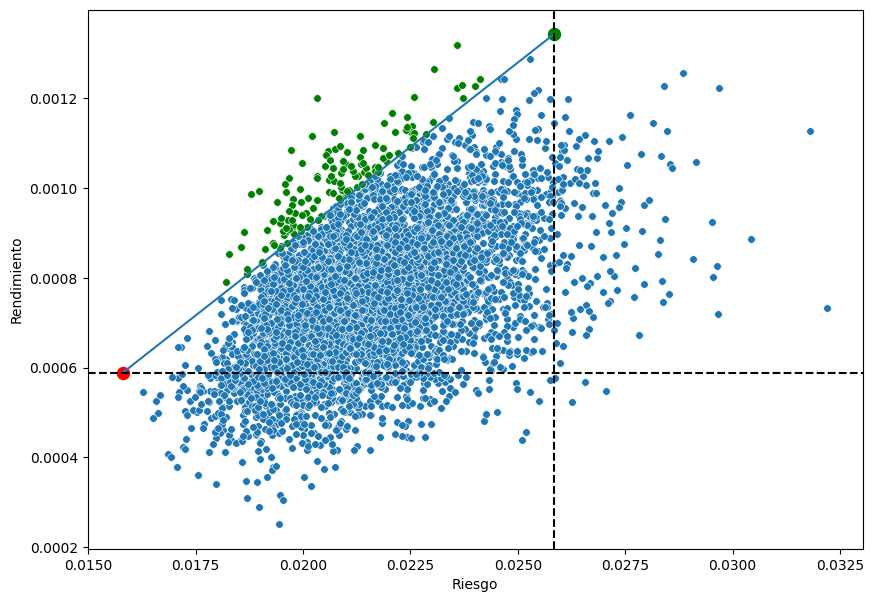

In [76]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=matrizPortafolio, x = 'Riesgo', y='Rendimiento', s=30)
sns.scatterplot(data=pendiente_optima, x = 'Riesgo', y='Rendimiento', color="green", s=30)


# Puntos de menor riesgo(rojo) y mayor retorno(Verde)
plt.scatter(x=mayorRendimiento[1], y=mayorRendimiento[0], color='green', marker='.', s=300)
plt.scatter(x=minimaVarianza[1], y=minimaVarianza[0], color='red', marker='.', s=300)

plt.plot([mayorRendimiento[1], minimaVarianza[1]], [mayorRendimiento[0], minimaVarianza[0]])


plt.axhline(y=minimaVarianza[0], color='black', linestyle='--')
plt.axvline(x=mayorRendimiento[1], color='black', linestyle='--')
plt.show()

### Definición de carteras según perfil de riesgo del inversor

 Borramos las carteras que no vamos a tomar

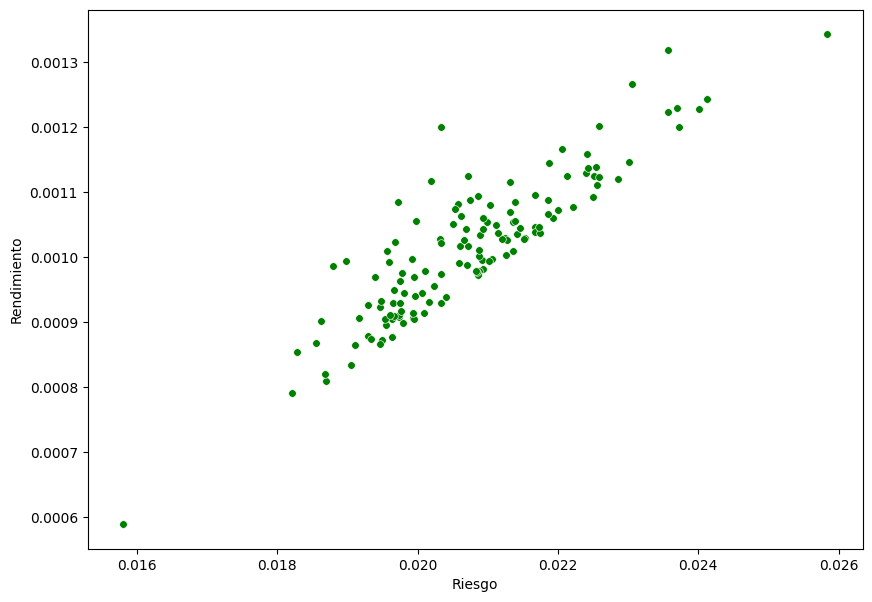

In [77]:
plt.figure(figsize=(10,7))
sns.scatterplot(data= pendiente_optima, x = 'Riesgo', y='Rendimiento',color='green', s=30)

#plt.plot([mayorRendimiento[1], minimaVarianza[1]], [mayorRendimiento[0], minimaVarianza[0]])
#plt.axhline(y=minimaVarianza[0], color='black', linestyle='--')
#plt.axvline(x=mayorRendimiento[1], color='black', linestyle='--')
plt.show()

#### Definir los 3 perfiles
Dividir en 3 sectores del gráfico según perfil del riesgo

In [78]:
division = (pendiente_optima['Riesgo'].max()  - pendiente_optima['Riesgo'].min()) / 3
division
bajo = pendiente_optima['Riesgo'].min() + division
medio = bajo + division

In [79]:
# Perfil Bajo
perfil_bajo = pendiente_optima[(pendiente_optima["Riesgo"] >= pendiente_optima["Riesgo"].min()) &
                 (pendiente_optima["Riesgo"] <= bajo)]
maximo_perfil_bajo = perfil_bajo.loc[perfil_bajo['Rendimiento'].idxmax()]
maximo_perfil_bajo_copy = maximo_perfil_bajo.copy()
maximo_perfil_bajo_mensual = maximo_perfil_bajo.copy()
print(f"Máximo rendimiento para perfil bajo: \n {maximo_perfil_bajo} \n ---------------")

# Perfil Medio
perfil_medio = pendiente_optima[(pendiente_optima["Riesgo"] >= bajo) &
                 (pendiente_optima["Riesgo"] <= medio)]
maximo_perfil_medio = perfil_medio.loc[perfil_medio['Rendimiento'].idxmax()]
maximo_perfil_medio_copy = maximo_perfil_medio.copy()
maximo_perfil_medio_mensual = maximo_perfil_medio.copy()
print(f"Máximo rendimiento para perfil Medio: \n {maximo_perfil_medio} \n ---------------")

# Perfil Alto
perfil_alto = pendiente_optima[pendiente_optima["Riesgo"] >= medio]
maximo_perfil_alto = perfil_alto.loc[perfil_alto['Rendimiento'].idxmax()]
maximo_perfil_alto_copy = maximo_perfil_alto.copy()
maximo_perfil_alto_mensual = maximo_perfil_alto.copy()
print(f"Máximo rendimiento para perfil Alto: \n {maximo_perfil_alto} \n ---------------")

Máximo rendimiento para perfil bajo: 
 Rendimiento    0.000994
Riesgo         0.018978
USD ADBE       0.058601
USD AMD        0.056126
USD BIIB       0.137407
USD INTC       0.083410
USD LCID       0.088676
USD MNST       0.346575
USD NFLX       0.008376
USD NVDA       0.220829
Name: 84, dtype: float64 
 ---------------
Máximo rendimiento para perfil Medio: 
 Rendimiento    0.001201
Riesgo         0.020330
USD ADBE       0.070801
USD AMD        0.089020
USD BIIB       0.103497
USD INTC       0.068154
USD LCID       0.004286
USD MNST       0.307506
USD NFLX       0.013843
USD NVDA       0.342893
Name: 105, dtype: float64 
 ---------------
Máximo rendimiento para perfil Alto: 
 Rendimiento    0.001343
Riesgo         0.025840
USD ADBE       0.247624
USD AMD        0.117180
USD BIIB       0.024179
USD INTC       0.042681
USD LCID       0.099154
USD MNST       0.044238
USD NFLX       0.000872
USD NVDA       0.424071
Name: 71, dtype: float64 
 ---------------


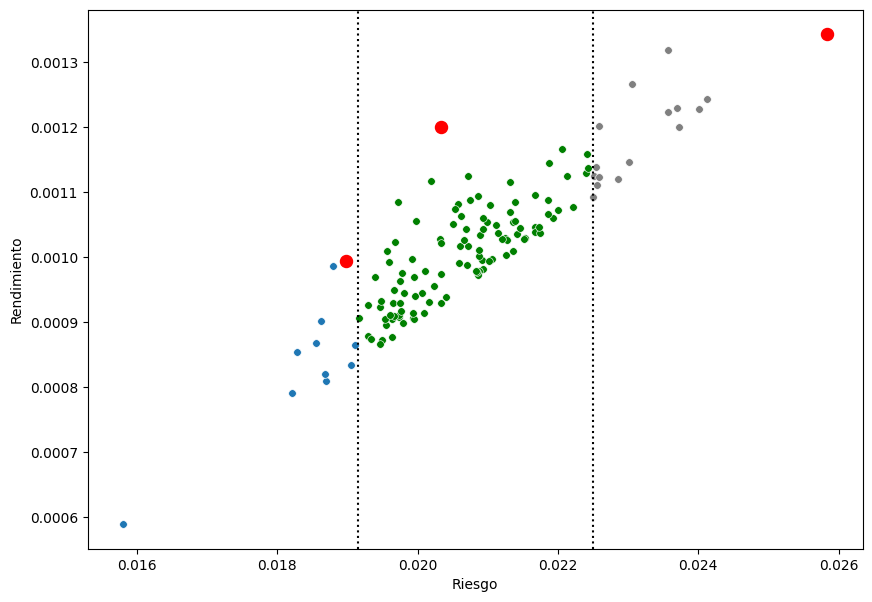

In [80]:
plt.figure(figsize=(10,7))

sns.scatterplot(data= perfil_bajo, x = 'Riesgo', y='Rendimiento', s=30)
sns.scatterplot(data= perfil_medio, x = 'Riesgo', y='Rendimiento', color='green', s=30)
sns.scatterplot(data= perfil_alto, x = 'Riesgo', y='Rendimiento', color='grey', s=30)

# Lineas verticales
plt.axvline(x=bajo, color='black', linestyle=':')
plt.axvline(x=medio, color='black', linestyle=':')

# Puntos máximos por perfil
plt.scatter(x=maximo_perfil_bajo[1], y=maximo_perfil_bajo[0], color='red', marker='.', s=300)
plt.scatter(x=maximo_perfil_medio[1], y=maximo_perfil_medio[0], color='red', marker='.', s=300)
plt.scatter(x=maximo_perfil_alto[1], y=maximo_perfil_alto[0], color='red', marker='.', s=300)

plt.show()

In [81]:
maximo_perfil_bajo = pd.DataFrame(maximo_perfil_bajo)
column_name = maximo_perfil_bajo.columns[0]
maximo_perfil_bajo.rename(columns={column_name: "Total %"}, inplace=True)
maximo_perfil_bajo['Total %'] = round(maximo_perfil_bajo['Total %'] * 100,2)
maximo_perfil_bajo['Total %'] = maximo_perfil_bajo['Total %'].astype(str) + " %"



In [82]:
maximo_perfil_medio = pd.DataFrame(maximo_perfil_medio)
column_name = maximo_perfil_medio.columns[0]
maximo_perfil_medio.rename(columns={column_name: "Total %"}, inplace=True)
maximo_perfil_medio['Total %'] = round(maximo_perfil_medio['Total %'] * 100,2)
maximo_perfil_medio['Total %'] = maximo_perfil_medio['Total %'].astype(str) + " %"


In [83]:
maximo_perfil_alto = pd.DataFrame(maximo_perfil_alto)
column_name = maximo_perfil_alto.columns[0]
maximo_perfil_alto.rename(columns={column_name: "Total %"}, inplace=True)
maximo_perfil_alto['Total %'] = round(maximo_perfil_alto['Total %'] * 100,2)
maximo_perfil_alto['Total %'] = maximo_perfil_alto['Total %'].astype(str) + " %"

In [84]:
print(f'\n--------------------------------------------------------\nA continuación el rendimiento DIARIO de cada cartera:\n--------------------------------------------------------\n')
print("INVERSIÓN TOTAL PARA PERFIL BAJO: \n")
display(maximo_perfil_bajo.T)
print("\nINVERSIÓN TOTAL PARA PERFIL MEDIO: \n")
display(maximo_perfil_medio.T)
print("\nINVERSIÓN TOTAL PARA PERFIL ALTO: \n")
display(maximo_perfil_alto.T)


--------------------------------------------------------
A continuación el rendimiento DIARIO de cada cartera:
--------------------------------------------------------

INVERSIÓN TOTAL PARA PERFIL BAJO: 



,Rendimiento,Riesgo,USD ADBE,USD AMD,USD BIIB,USD INTC,USD LCID,USD MNST,USD NFLX,USD NVDA
Total %,0.1 %,1.9 %,5.86 %,5.61 %,13.74 %,8.34 %,8.87 %,34.66 %,0.84 %,22.08 %



INVERSIÓN TOTAL PARA PERFIL MEDIO: 



,Rendimiento,Riesgo,USD ADBE,USD AMD,USD BIIB,USD INTC,USD LCID,USD MNST,USD NFLX,USD NVDA
Total %,0.12 %,2.03 %,7.08 %,8.9 %,10.35 %,6.82 %,0.43 %,30.75 %,1.38 %,34.29 %



INVERSIÓN TOTAL PARA PERFIL ALTO: 



,Rendimiento,Riesgo,USD ADBE,USD AMD,USD BIIB,USD INTC,USD LCID,USD MNST,USD NFLX,USD NVDA
Total %,0.13 %,2.58 %,24.76 %,11.72 %,2.42 %,4.27 %,9.92 %,4.42 %,0.09 %,42.41 %


In [85]:
# Perfil Bajo Mensual

maximo_perfil_bajo_mensual = pd.DataFrame(maximo_perfil_bajo_mensual)

column_name = maximo_perfil_bajo_mensual.columns[0]
maximo_perfil_bajo_mensual.rename(columns={column_name: "Total %"}, inplace=True)

maximo_perfil_bajo_mensual = maximo_perfil_bajo_mensual.T


# Perfil Medio Mensual

maximo_perfil_medio_mensual = pd.DataFrame(maximo_perfil_medio_mensual)

column_name = maximo_perfil_medio_mensual.columns[0]
maximo_perfil_medio_mensual.rename(columns={column_name: "Total %"}, inplace=True)

maximo_perfil_medio_mensual = maximo_perfil_medio_mensual.T

# Perfil Alto Mensual

maximo_perfil_alto_mensual = pd.DataFrame(maximo_perfil_alto_mensual)

column_name = maximo_perfil_alto_mensual.columns[0]
maximo_perfil_alto_mensual.rename(columns={column_name: "Total %"}, inplace=True)

maximo_perfil_alto_mensual = maximo_perfil_alto_mensual.T

# Promedio de días de los meses en el año
dias_de_meses = 30.41

maximo_perfil_bajo_mensual['Rendimiento'] = ((1 + maximo_perfil_bajo_mensual['Rendimiento'] ) ** dias_de_meses - 1)
maximo_perfil_medio_mensual['Rendimiento'] = ((1 + maximo_perfil_medio_mensual['Rendimiento'] ) ** dias_de_meses - 1)
maximo_perfil_alto_mensual['Rendimiento'] = ((1 + maximo_perfil_alto_mensual['Rendimiento'] ) ** dias_de_meses - 1)

maximo_perfil_bajo_mensual.loc['Total %'] = maximo_perfil_bajo_mensual.loc['Total %'].apply(lambda x: "{:.2f}%".format(x * 100))
maximo_perfil_medio_mensual.loc['Total %'] = maximo_perfil_medio_mensual.loc['Total %'].apply(lambda x: "{:.2f}%".format(x * 100))
maximo_perfil_alto_mensual.loc['Total %'] = maximo_perfil_alto_mensual.loc['Total %'].apply(lambda x: "{:.2f}%".format(x * 100))



In [86]:
print(f'\n--------------------------------------------------------\nA continuación el rendimiento MENSUAL de cada cartera:\n--------------------------------------------------------\n')
print("INVERSIÓN TOTAL PARA PERFIL BAJO: \n")
display(maximo_perfil_bajo_mensual)
print("\nINVERSIÓN TOTAL PARA PERFIL MEDIO: \n")
display(maximo_perfil_medio_mensual)
print("\nINVERSIÓN TOTAL PARA PERFIL ALTO: \n")
display(maximo_perfil_alto_mensual)


--------------------------------------------------------
A continuación el rendimiento MENSUAL de cada cartera:
--------------------------------------------------------

INVERSIÓN TOTAL PARA PERFIL BAJO: 



,Rendimiento,Riesgo,USD ADBE,USD AMD,USD BIIB,USD INTC,USD LCID,USD MNST,USD NFLX,USD NVDA
Total %,3.07%,1.90%,5.86%,5.61%,13.74%,8.34%,8.87%,34.66%,0.84%,22.08%



INVERSIÓN TOTAL PARA PERFIL MEDIO: 



,Rendimiento,Riesgo,USD ADBE,USD AMD,USD BIIB,USD INTC,USD LCID,USD MNST,USD NFLX,USD NVDA
Total %,3.72%,2.03%,7.08%,8.90%,10.35%,6.82%,0.43%,30.75%,1.38%,34.29%



INVERSIÓN TOTAL PARA PERFIL ALTO: 



,Rendimiento,Riesgo,USD ADBE,USD AMD,USD BIIB,USD INTC,USD LCID,USD MNST,USD NFLX,USD NVDA
Total %,4.17%,2.58%,24.76%,11.72%,2.42%,4.27%,9.92%,4.42%,0.09%,42.41%


# MODELO PREDICTIVO


## Predicción y test

[*********************100%***********************]  1 of 1 completed
Error cuadrático medio para AMD: 2.6756063615914583


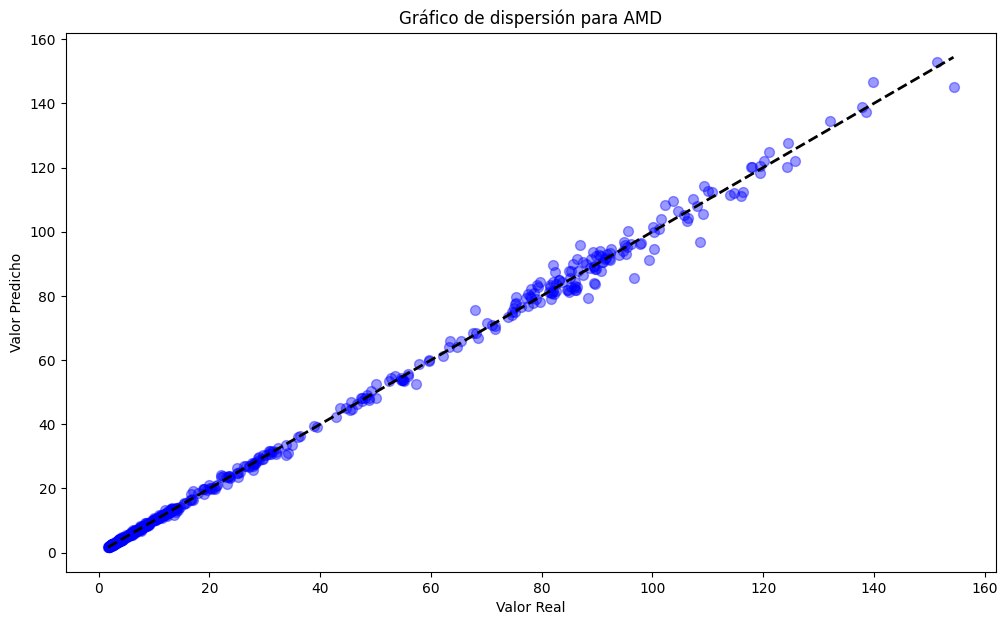

[*********************100%***********************]  1 of 1 completed
Error cuadrático medio para LCID: 4.50540144712858


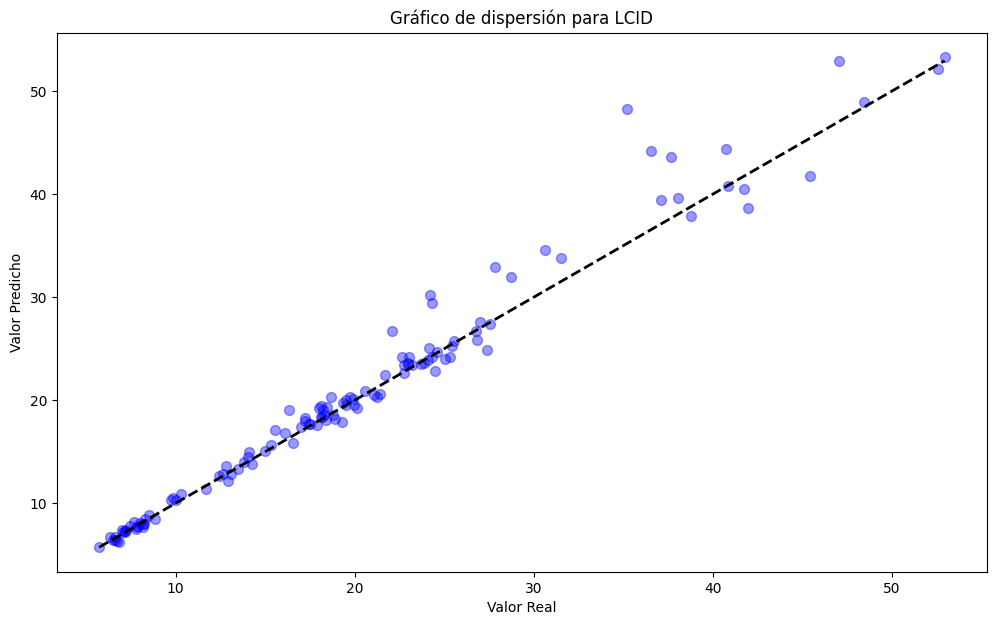

[*********************100%***********************]  1 of 1 completed
Error cuadrático medio para MNST: 0.26717081862744285


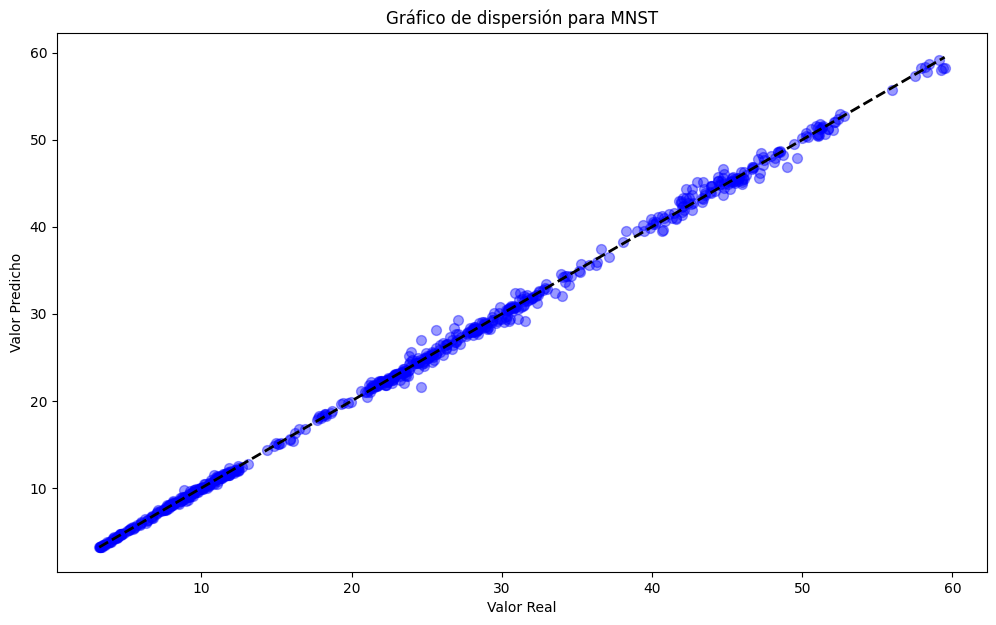

[*********************100%***********************]  1 of 1 completed
Error cuadrático medio para BIIB: 72.16648925070537


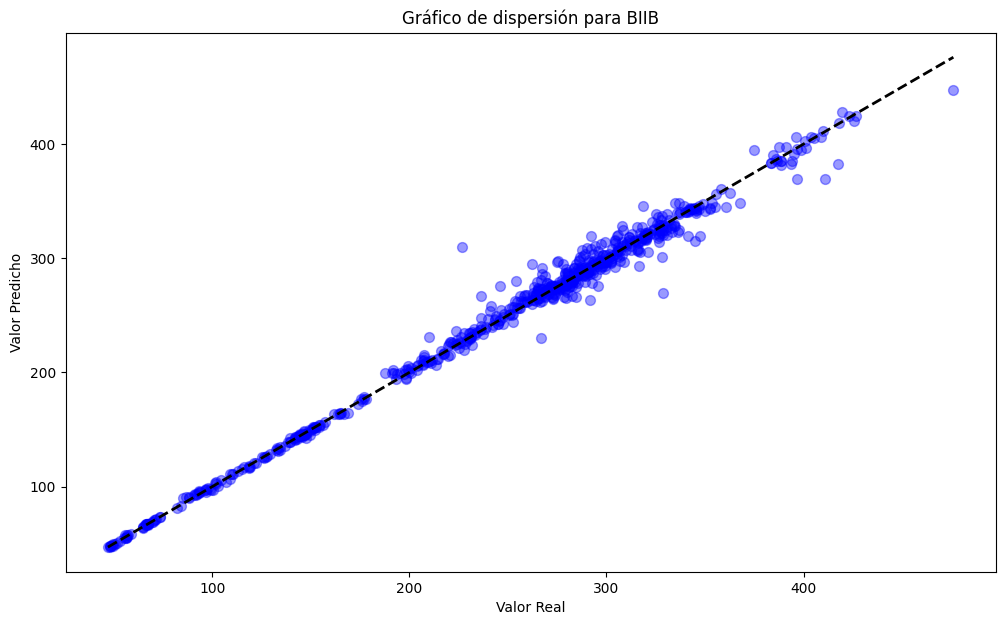

[*********************100%***********************]  1 of 1 completed
Error cuadrático medio para NVDA: 12.997667723985847


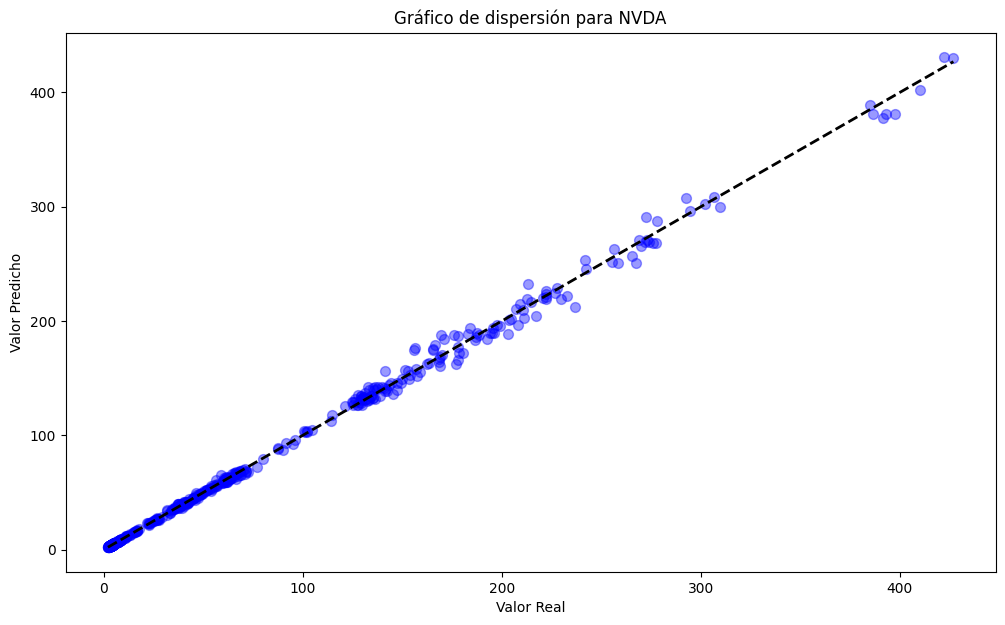

[*********************100%***********************]  1 of 1 completed
Error cuadrático medio para ADBE: 50.140141551002394


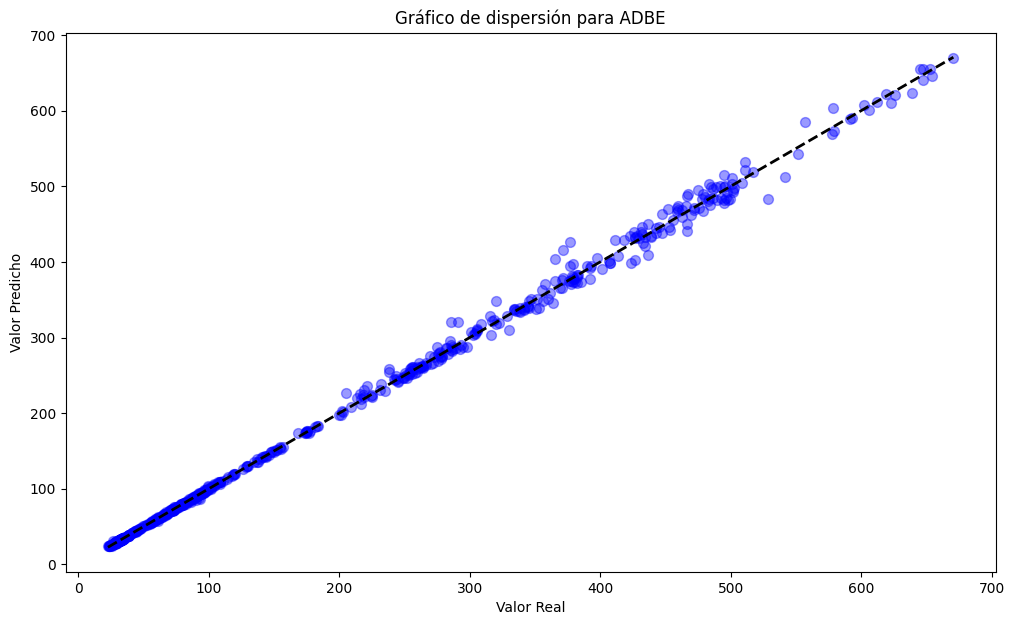

[*********************100%***********************]  1 of 1 completed
Error cuadrático medio para NFLX: 86.20506607445958


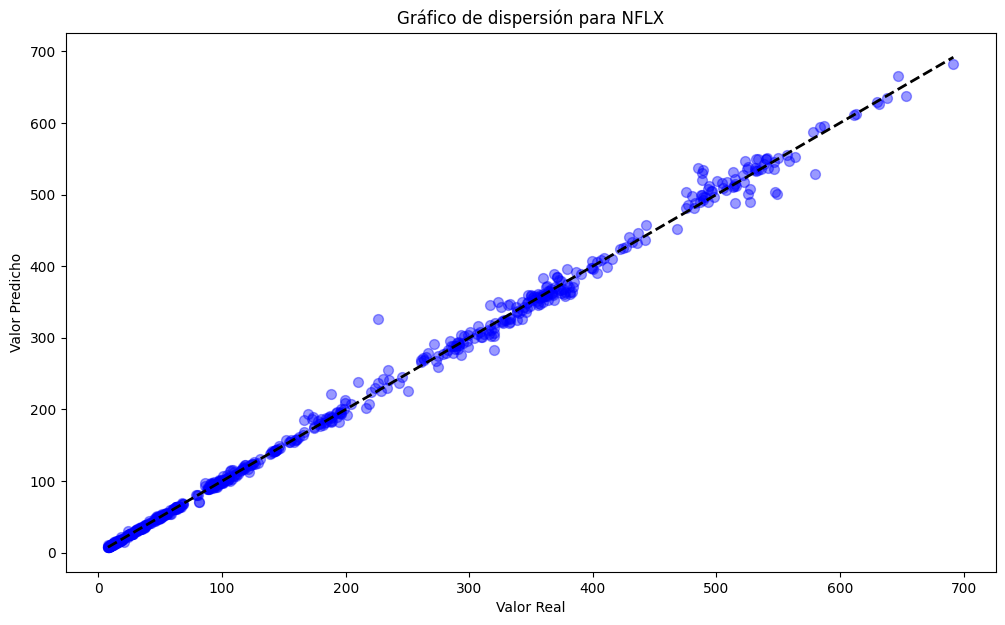

[*********************100%***********************]  1 of 1 completed
Error cuadrático medio para INTC: 0.9351415407869141


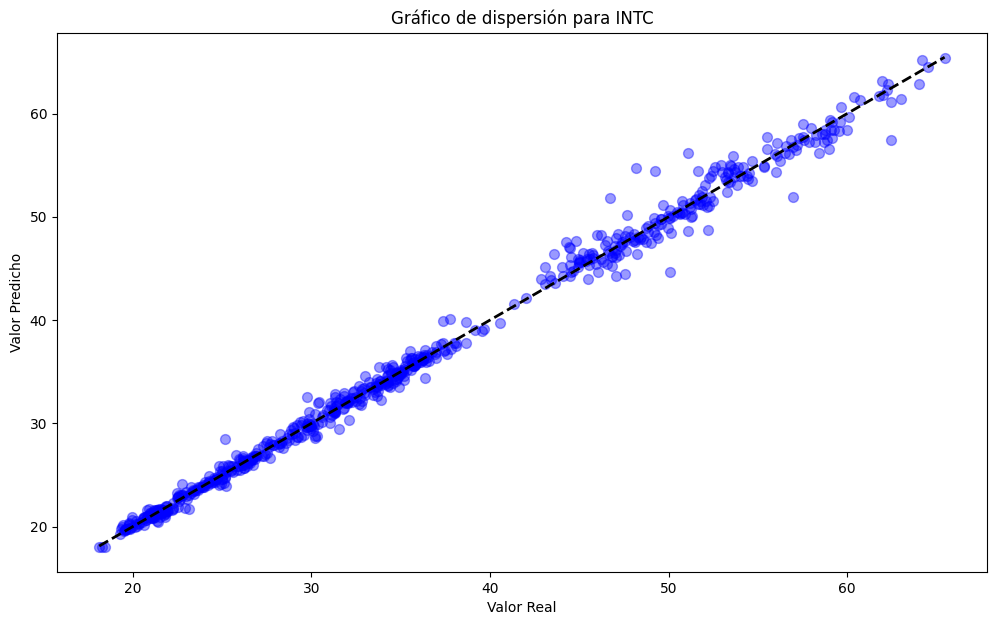

,Activo,error_cuadratico_medio
0,AMD,2.675606
1,LCID,4.505401
2,MNST,0.267171
3,BIIB,72.166489
4,NVDA,12.997668
5,ADBE,50.140142
6,NFLX,86.205066
7,INTC,0.935142


,Activo,Precio_Predicho
0,AMD,112.797998
1,LCID,5.692500
2,MNST,59.182599
3,BIIB,294.840201
4,NVDA,430.810801
5,ADBE,498.851901
6,NFLX,425.196609
7,INTC,34.541700


In [87]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

errores_cuadraticos = pd.DataFrame(columns=['Activo', 'error_cuadratico_medio'])
predictions_df = pd.DataFrame(columns=['Activo', 'Precio_Predicho'])

for activo in activos:

    # Descargar los datos históricos del activo utilizando yfinance
    ''' Tomamos un set de datos mayor al anterior análisis, ya que esto
    ayuda al modelo a ser entrenado
    '''
    data = yf.download(activo, start='2010-01-01', end=today)

    # Calcular características técnicas adicionales
    ''' crea una ventana deslizante de tamaño 10, 30, 60, 100,
    lo que significa, que por ejemplo, se calcula la media de los
    últimos 30 períodos SMA_30 (en este caso, 30 días) de datos.
    '''
    data['SMA_10'] = data['Close'].rolling(window=10).mean()
    data['SMA_30'] = data['Close'].rolling(window=30).mean()
    data['SMA_60'] = data['Close'].rolling(window=60).mean()
    data['SMA_100'] = data['Close'].rolling(window=100).mean()

    # Eliminar filas con valores faltantes
    data.dropna(inplace=True)

    # Seleccionar características y objetivo
    features = ['SMA_10', 'SMA_30', 'SMA_60', 'SMA_100']
    target = 'Close'

    '''
    Se asignan las X e Y de los train y tests.
    En el test_size=0.2 : Usamos el 80% de los datos
    para el entrenamiento y 20% de los datos para el test
    '''
    X = data[features].values
    y = data[target].values

    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Entrenar un modelo de árbol de decisión
    regressor = RandomForestRegressor(n_estimators=100, random_state=0)
    regressor.fit(X_train, y_train)

    # Predecir los precios de las acciones utilizando los datos de prueba
    y_pred = regressor.predict(X_test)

    # Evaluar la precisión del modelo utilizando el error cuadrático medio (MSE)
    mse = mean_squared_error(y_test, y_pred)
    errores_cuadraticos = errores_cuadraticos.append({'Activo': activo, 'error_cuadratico_medio': mse}, ignore_index=True)
    print(f"Error cuadrático medio para {activo}: {mse}")

    plt.figure(figsize=(12,7))
    plt.scatter(y_test, y_pred, color='blue', marker='.', alpha=0.4, s=200)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Valor Real')
    plt.ylabel('Valor Predicho')
    plt.title(f"Gráfico de dispersión para {activo}")
    plt.show()

    # Obtener los datos de características técnicas para la última fecha disponible
    last_date = data.index[-1]
    next_month = last_date + timedelta(days=30)
    next_month_data = data.loc[last_date][features].values.reshape(1, -1)

    # Predecir el precio de la acción para el mes siguiente
    next_month_price = regressor.predict(next_month_data)

     # Agregar el precio predicho y el nombre del activo al DataFrame
    predictions_df = predictions_df.append({'Activo': activo, 'Precio_Predicho': next_month_price[0]}, ignore_index=True)

display(errores_cuadraticos)
display(predictions_df)

## Comparación y rendimiento con periodo actual y futuro

In [88]:
# Tomamos el precio del último periodo de los activos
periodo_actual = pd.DataFrame(dataSet.iloc[-1])
periodo_actual.rename(columns={periodo_actual.columns[0]:'Periodo_Actual'}, inplace=True)

# Seteamos la columna de "Activo" del DataFrame predicho como index, para hacer merge con el periodo actual
predictions_df.set_index('Activo', inplace=True)
predictions_df = predictions_df.merge(periodo_actual, left_index=True, right_index=True)

# Sacamos el rendimiento entre lo actual y la predicción
predictions_df["% R"] = (predictions_df['Precio_Predicho'] - predictions_df['Periodo_Actual']) / predictions_df['Periodo_Actual']

In [89]:
predictions_df

,Precio_Predicho,Periodo_Actual,% R
AMD,112.797998,110.010002,0.025343
LCID,5.692500,5.470000,0.040676
MNST,59.182599,59.110001,0.001228
BIIB,294.840201,284.519989,0.036272
NVDA,430.810801,422.089996,0.020661
ADBE,498.851901,484.720001,0.029155
NFLX,425.196609,424.019989,0.002775
INTC,34.541700,33.000000,0.046718


# RESULTADOS FINALES


## Cálculo de la experanza predicha

Multiplicamos las matrices de rendimiento ("% R") y la inversión de nuestro capital según nuestro perfil Bajo, Medio o Alto. De esta manera obtenemos la esperanza para el próximo mes.

#### Tomamos la columna de rendimiento predicho


```
np.array(predictions_df["% R"])
```
#### Y los porcentajes de inversión de nuestro capital para cada activo. En este caso para la cartera de un perfil de bajo riesgo.

```
maximo_perfil_bajo_copy[2:]
```

#### Luego se multiplican y obtenemos nuestra predicción de rendimiento para el próximo mes



```
np.dot(maximo_perfil_bajo_copy[2:], np.array(predictions_df["% R"]))
```








### Esperanza Predicha para perfil de riesgo BAJO

In [117]:
esperanza_perfil_bajo = np.dot(maximo_perfil_bajo_copy[2:], np.array(predictions_df["% R"]))
print(f"\n-------------------------------------\nEsperanza para perfil bajo -> {round(esperanza_perfil_bajo * 100,2)} %\n-------------------------------------\n\n")

print(f"--------------------------------\nCon las siguientes inversiones:\n--------------------------------")
display(maximo_perfil_bajo_mensual[maximo_perfil_bajo_mensual.columns[2:]])

print(f"\n-------------------------------------------------------\nY los siguientes precios predichos para el próximo mes:\n-------------------------------------------------------")
display(predictions_df[["Precio_Predicho"]].T)



-------------------------------------
Esperanza para perfil bajo -> 2.92 %
-------------------------------------


--------------------------------
Con las siguientes inversiones:
--------------------------------


,USD ADBE,USD AMD,USD BIIB,USD INTC,USD LCID,USD MNST,USD NFLX,USD NVDA
Total %,5.86%,5.61%,13.74%,8.34%,8.87%,34.66%,0.84%,22.08%



-------------------------------------------------------
Y los siguientes precios predichos para el próximo mes:
-------------------------------------------------------


,AMD,LCID,MNST,BIIB,NVDA,ADBE,NFLX,INTC
Precio_Predicho,112.797998,5.6925,59.182599,294.840201,430.810801,498.851901,425.196609,34.5417


### Esperanza Predicha para perfil de riesgo MEDIO

In [118]:
esperanza_perfil_medio = np.dot(maximo_perfil_medio_copy[2:], np.array(predictions_df["% R"]))
print(f"\n-------------------------------------\nEsperanza para perfil medio -> {round(esperanza_perfil_medio * 100,2)} %\n-------------------------------------\n\n")

print(f"--------------------------------\nCon las siguientes inversiones:\n--------------------------------")
display(maximo_perfil_medio_mensual[maximo_perfil_medio_mensual.columns[2:]])

print(f"\n-------------------------------------------------------\nY los siguientes precios predichos para el próximo mes:\n-------------------------------------------------------")
display(predictions_df[["Precio_Predicho"]].T)


-------------------------------------
Esperanza para perfil medio -> 3.31 %
-------------------------------------


--------------------------------
Con las siguientes inversiones:
--------------------------------


,USD ADBE,USD AMD,USD BIIB,USD INTC,USD LCID,USD MNST,USD NFLX,USD NVDA
Total %,7.08%,8.90%,10.35%,6.82%,0.43%,30.75%,1.38%,34.29%



-------------------------------------------------------
Y los siguientes precios predichos para el próximo mes:
-------------------------------------------------------


,AMD,LCID,MNST,BIIB,NVDA,ADBE,NFLX,INTC
Precio_Predicho,112.797998,5.6925,59.182599,294.840201,430.810801,498.851901,425.196609,34.5417


### Esperanza Predicha para perfil de riesgo ALTO 🚀 💰 💸 🤑

In [119]:
esperanza_perfil_alto = np.dot(maximo_perfil_alto_copy[2:], np.array(predictions_df["% R"]))
print(f"\n-------------------------------------\nEsperanza para perfil alto -> {round(esperanza_perfil_alto * 100,2)} %\n-------------------------------------\n\n")

print(f"--------------------------------\nCon las siguientes inversiones:\n--------------------------------")
display(maximo_perfil_alto_mensual[maximo_perfil_alto_mensual.columns[2:]])

print(f"\n-------------------------------------------------------\nY los siguientes precios predichos para el próximo mes:\n-------------------------------------------------------")
display(predictions_df[["Precio_Predicho"]].T)


-------------------------------------
Esperanza para perfil alto -> 3.58 %
-------------------------------------


--------------------------------
Con las siguientes inversiones:
--------------------------------


,USD ADBE,USD AMD,USD BIIB,USD INTC,USD LCID,USD MNST,USD NFLX,USD NVDA
Total %,24.76%,11.72%,2.42%,4.27%,9.92%,4.42%,0.09%,42.41%



-------------------------------------------------------
Y los siguientes precios predichos para el próximo mes:
-------------------------------------------------------


,AMD,LCID,MNST,BIIB,NVDA,ADBE,NFLX,INTC
Precio_Predicho,112.797998,5.6925,59.182599,294.840201,430.810801,498.851901,425.196609,34.5417
